In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ConceptAI

/content/drive/MyDrive/ConceptAI


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

whr_data = pd.read_csv("WHR-2024-5CS037.csv")

print("DATASET INFO")
whr_data.head(20)

DATASET INFO


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [4]:
print("\nNumber of rows and columns in the dataset:")
print(whr_data.shape)



Number of rows and columns in the dataset:
(143, 9)


In [5]:
print("\nColumns and their data types:")
print(whr_data.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [6]:
score_mean = whr_data['score'].mean()
score_median = whr_data['score'].median()
score_std = whr_data['score'].std()

print(f"\nMean of 'Score': {score_mean}")
print(f"Median of 'Score': {score_median}")
print(f"Standard Deviation of 'Score': {score_std}")


Mean of 'Score': 5.52758041958042
Median of 'Score': 5.785
Standard Deviation of 'Score': 1.1707165099442995


In [7]:
highest_score = whr_data['score'].max()
lowest_score = whr_data['score'].min()
print(highest_score)
print(lowest_score)

7.741
1.721


In [8]:
missing_values = whr_data.isnull().sum()
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [9]:
filtered_whr_data = whr_data[whr_data['score'] > 7.5]
filtered_whr_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [10]:
sorted_whr_data = filtered_whr_data.sort_values(by='Log GDP per capita', ascending=False)
sorted_whr_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [11]:
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif score <= 6:
        return "Medium"
    else:
        return "High"

In [12]:
whr_data['Happiness Category'] = whr_data['score'].apply(categorize_happiness)
sorted_whr_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


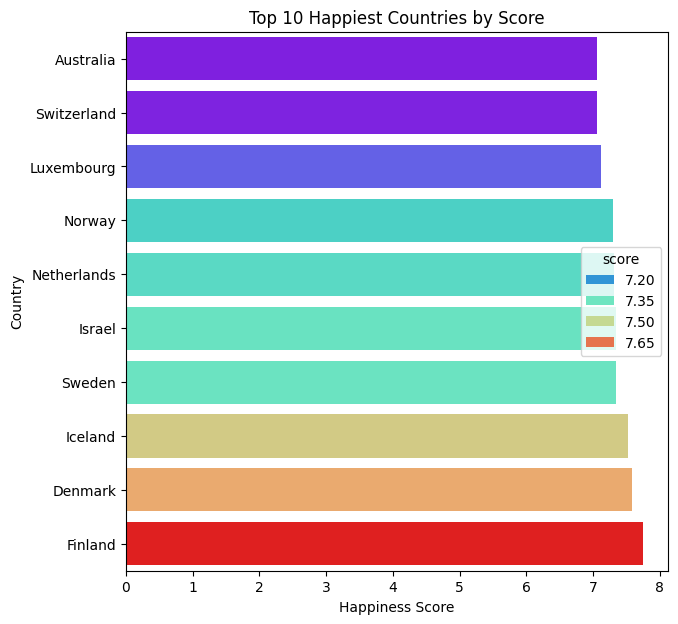

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming whr_data is your original DataFrame
imputed_data = whr_data.copy()  # Create a copy to avoid modifying the original

# Add a new column for happiness categories
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

imputed_data['Happiness Category'] = imputed_data['score'].apply(categorize_happiness)

# Visualization: Top 10 happiest countries
top_10_happiest = imputed_data.nlargest(10, 'score')
plt.figure(figsize=(7,7))
sns.barplot(data=top_10_happiest, x='score', y='Country name', hue='score' , palette='rainbow')
plt.gca().invert_yaxis()
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

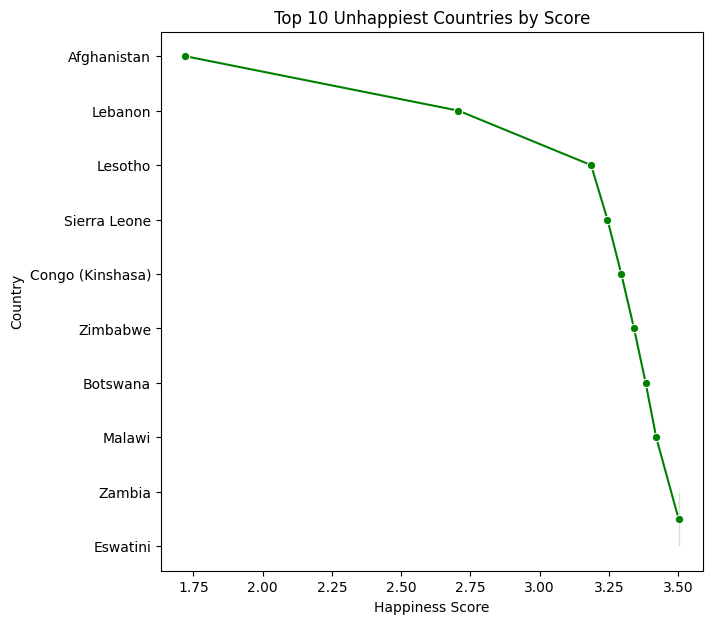

In [14]:
# Visualization: Top 10 unhappiest countries
top_10_unhappiest = imputed_data.nsmallest(10, 'score')
plt.figure(figsize=(7,7))
sns.lineplot(data=top_10_unhappiest, x='score', y='Country name', marker='o', color='Green')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


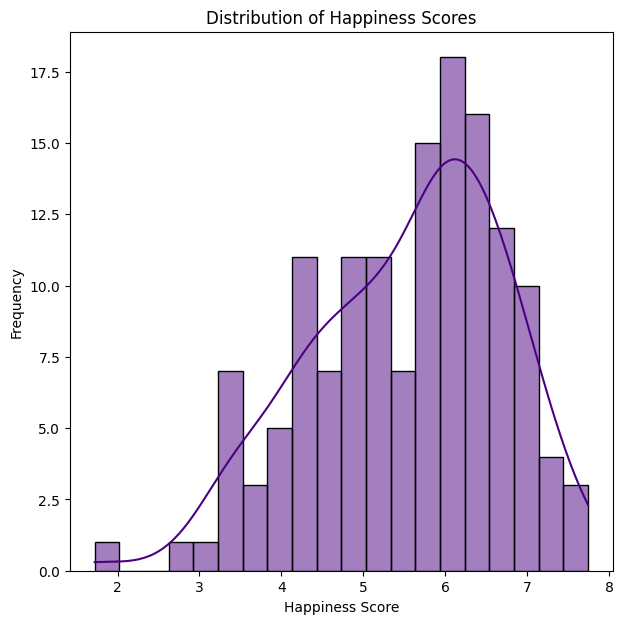

In [15]:
# Histogram for score distribution
plt.figure(figsize=(7, 7))
sns.histplot(imputed_data['score'], kde=True, bins=20, color='indigo')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


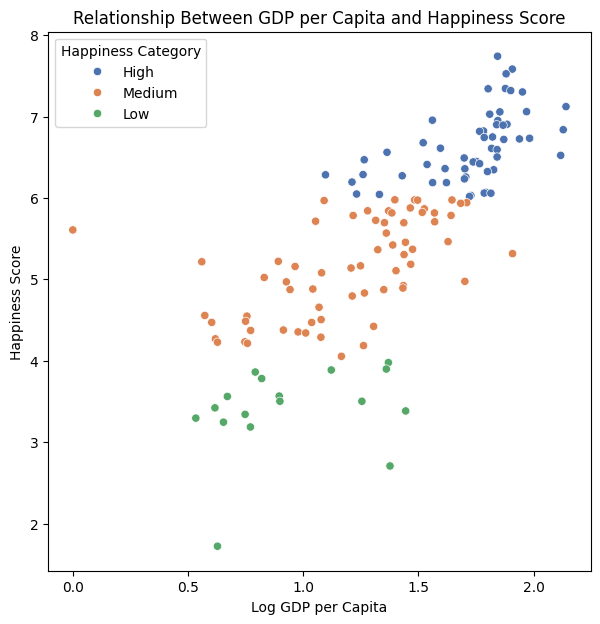

In [16]:
# Scatter Plot: GDP per Capita vs Happiness Score
plt.figure(figsize=(7, 7))
sns.scatterplot(data=imputed_data, x='Log GDP per capita', y='score', hue='Happiness Category', palette='deep')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()



In [17]:
#1. Define the countries in South Asia with a list for example:
#south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [18]:
# Step 1: Filter the dataset for South Asian countries
south_asia_data = whr_data[whr_data['Country name'].isin(south_asian_countries)]

In [19]:
# Save the filtered South Asian dataset for future use
south_asia_data.to_csv('SouthAsia_Happy_data.csv', index=False)
print("Filtered South Asian dataset saved as 'SouthAsia_Happy_data.csv'")

Filtered South Asian dataset saved as 'SouthAsia_Happy_data.csv'


In [20]:
south_asia_data = south_asia_data.copy()

# Create the Composite Score column
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

In [21]:
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

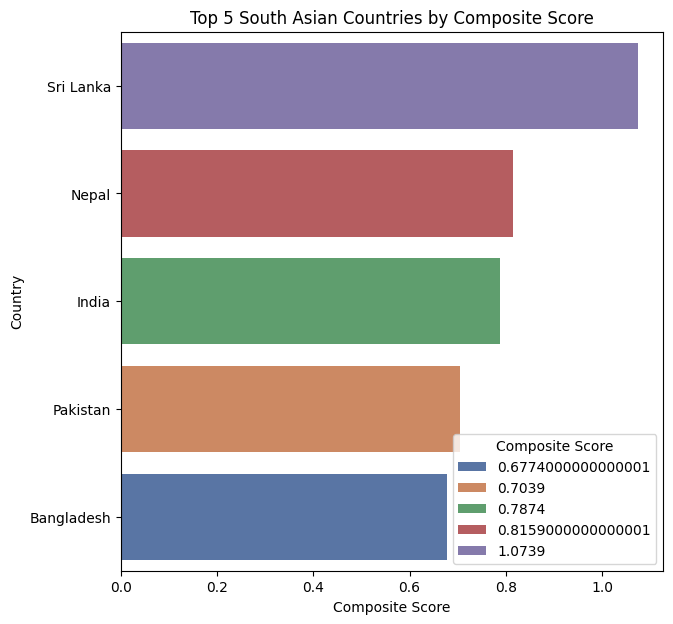

In [22]:
top_5_composite = south_asia_data.head(5)
plt.figure(figsize=(7,7))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, hue='Composite Score' ,palette='deep')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

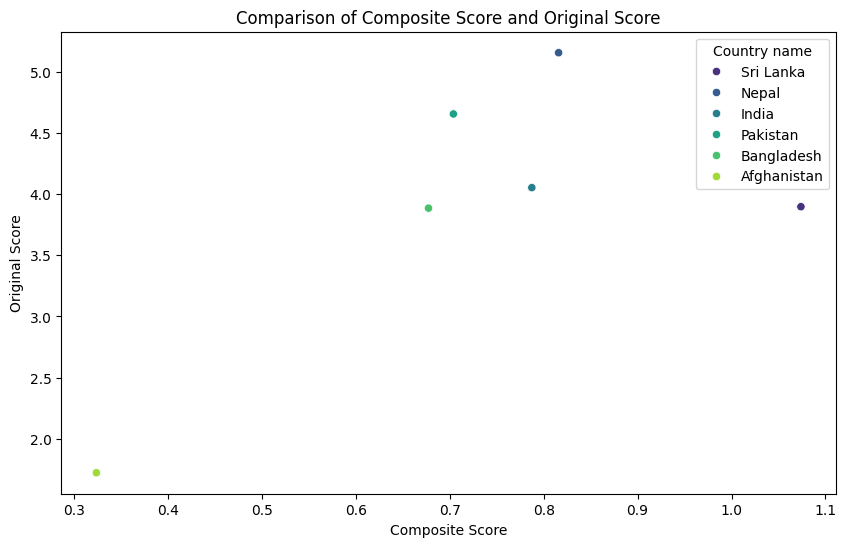

In [23]:
# 4. Compare Composite Score rankings with the original Score

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_data, hue='Country name', palette='viridis')
plt.title('Comparison of Composite Score and Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.show()

In [24]:
# Task 3: Outlier Detection
# 1. Identify outliers based on Score and GDP per Capita using the 1.5x IQR rule
def detect_outliers(column):
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia_data[(south_asia_data[column] < lower_bound) | (south_asia_data[column] > upper_bound)]

outliers_score = detect_outliers('score')
outliers_gdp = detect_outliers('Log GDP per capita')

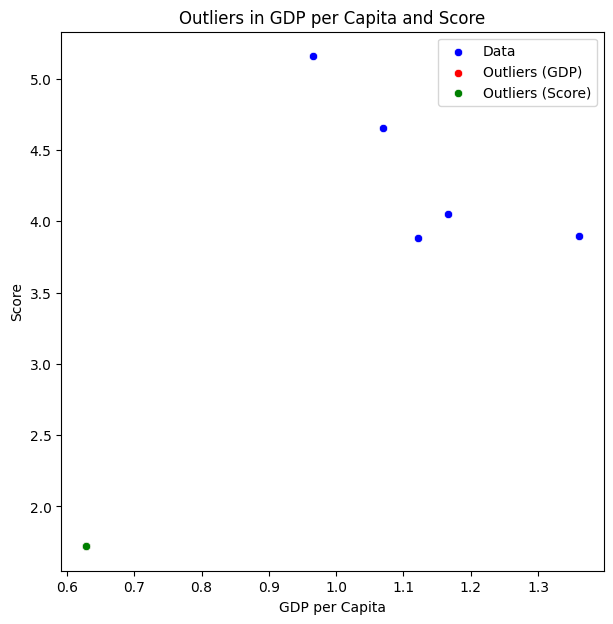

In [25]:
# 2. Scatter plot highlighting outliers
plt.figure(figsize=(7, 7))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='blue', label='Data')
sns.scatterplot(x=outliers_gdp['Log GDP per capita'], y=outliers_gdp['score'], color='red', label='Outliers (GDP)')
sns.scatterplot(x=outliers_score['Log GDP per capita'], y=outliers_score['score'], color='green', label='Outliers (Score)')
plt.title('Outliers in GDP per Capita and Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

In [26]:
# Task 4: Exploring Trends Across Metrics
# 1. Calculate Pearson correlation for selected metrics
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Pearson correlation between {metric} and Score: {correlation:.2f}")

Pearson correlation between Freedom to make life choices and Score: 0.80
Pearson correlation between Generosity and Score: 0.87


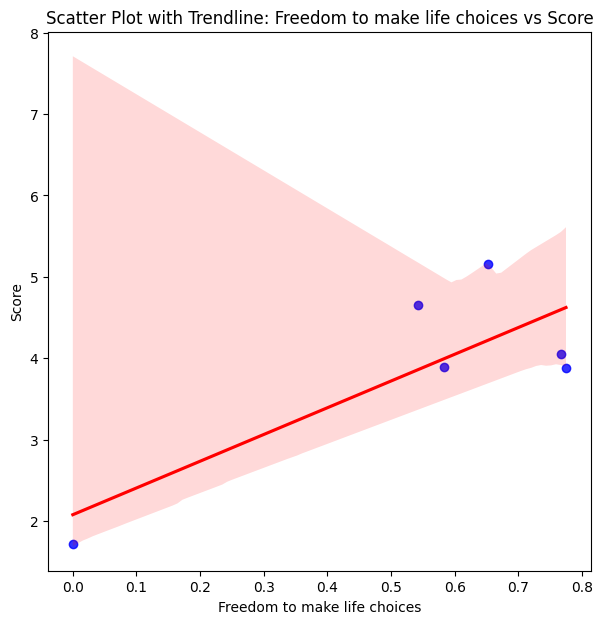

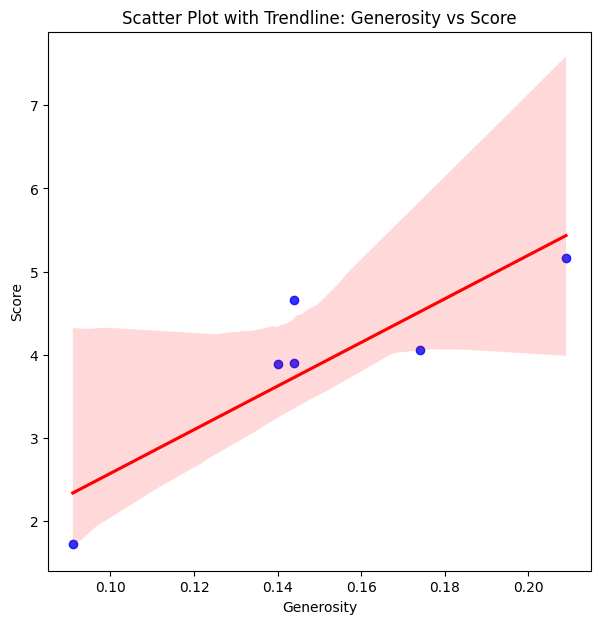

In [27]:
for metric in metrics:
    plt.figure(figsize=(7,7))
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot with Trendline: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

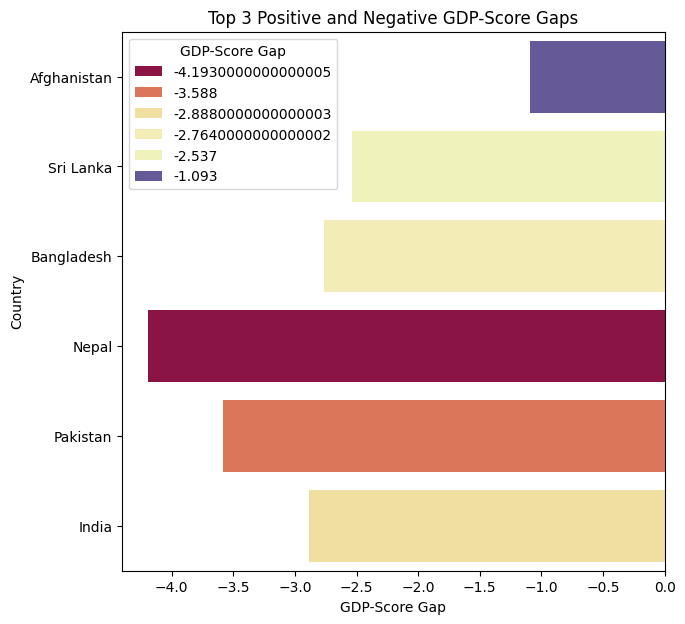

In [28]:
# Task 5: Gap Analysis
# 1. Add a new column for GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

# 3. Bar chart for top 3 countries with largest positive and negative gaps
top_3_positive_gap = gap_sorted_desc.head(3)
top_3_negative_gap = gap_sorted_asc.head(3)

plt.figure(figsize=(7, 7))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), hue='GDP-Score Gap', palette='Spectral')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

In [29]:
# 4. Analysis of gaps
print("\nAnalysis of GDP-Score Gaps:")
print("Top 3 Positive Gaps:")
print(top_3_positive_gap[['Country name', 'GDP-Score Gap']])
print("\nTop 3 Negative Gaps:")
print(top_3_negative_gap[['Country name', 'GDP-Score Gap']])


Analysis of GDP-Score Gaps:
Top 3 Positive Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Negative Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


In [30]:
# Define Middle Eastern countries
Middle_East_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [31]:
# Filter dataset for Middle Eastern countries
middle_east_data = whr_data[whr_data['Country name'].isin(Middle_East_countries)]
middle_east_data = middle_east_data.copy()

In [32]:
# Save Middle Eastern dataset for future use
middle_east_data.to_csv('Middle_East_Happiness.csv', index=False)
print("Filtered Middle Eastern dataset saved as 'Middle_East_Happiness.csv'")

Filtered Middle Eastern dataset saved as 'Middle_East_Happiness.csv'


In [33]:
# 1. Descriptive Statistics
# Calculate mean and standard deviation of Score for South Asia and Middle East
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Which region has higher happiness scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57
Middle East has a higher average happiness score.


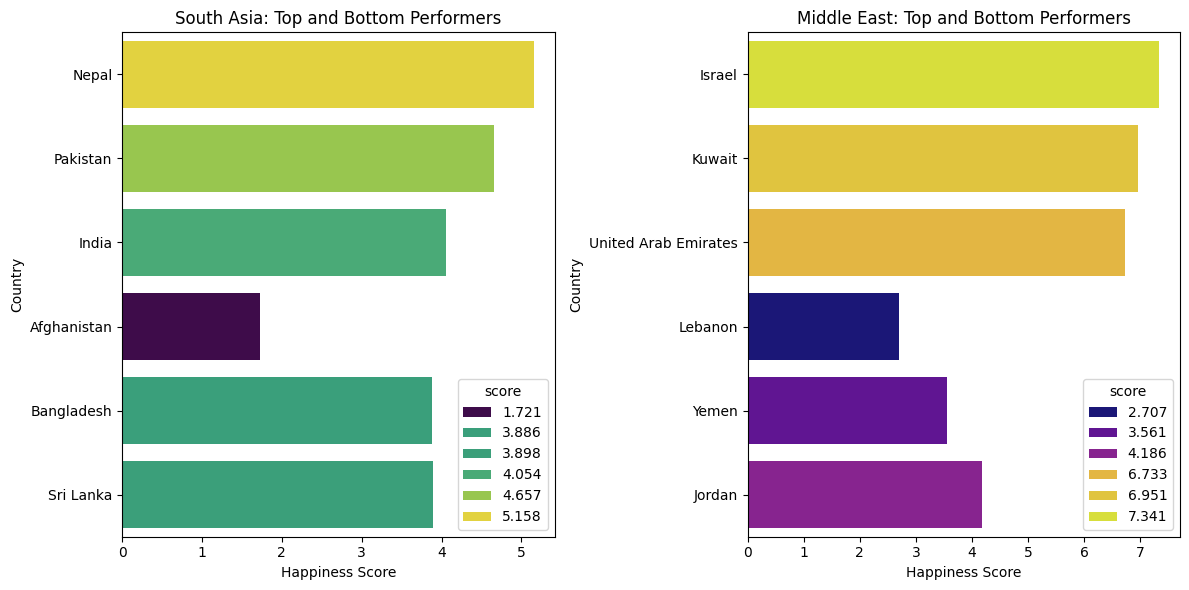

In [34]:
# 2. Top and Bottom Performers
# Identify top 3 and bottom 3 countries by Score in each region
south_asia_top3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom3 = south_asia_data.nsmallest(3, 'score')
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Bar chart for top 3 and bottom 3 countries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]),hue='score', palette='viridis')
plt.title('South Asia: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]),hue='score', palette='plasma')
plt.title('Middle East: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

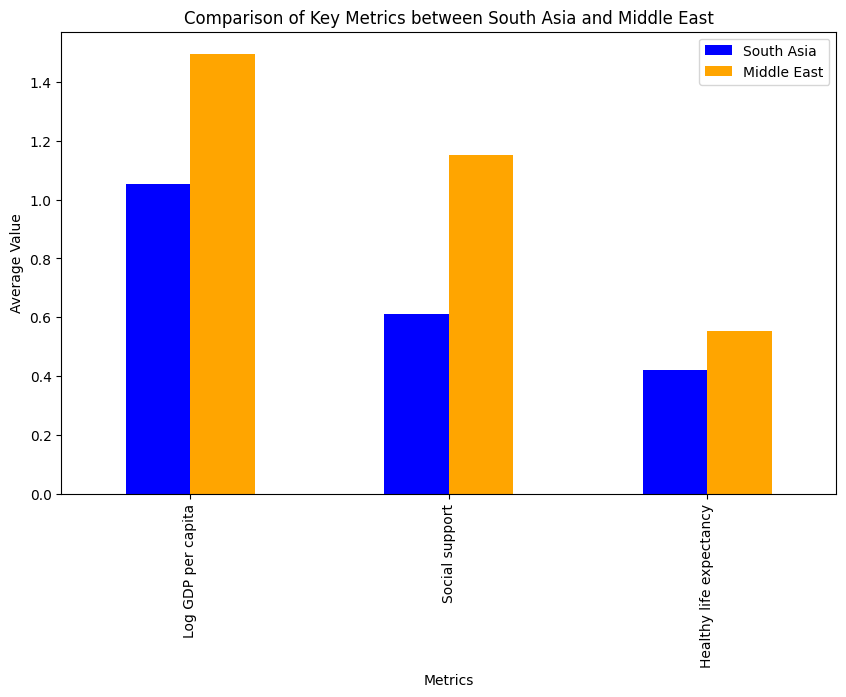

Metric with largest disparity: Social support


In [35]:
# 3. Metric Comparisons
# Grouped bar chart for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': south_asia_means, 'Middle East': middle_east_means})
comparison_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.legend()
plt.show()

# Which metric shows the largest disparity?
disparity = (middle_east_means - south_asia_means).abs()
print("Metric with largest disparity:", disparity.idxmax())

In [36]:
# 4. Happiness Disparity
# Compute range and coefficient of variation for Score
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean

print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}")

# Which region has greater variability?
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")

South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
South Asia has greater variability in happiness scores.


Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


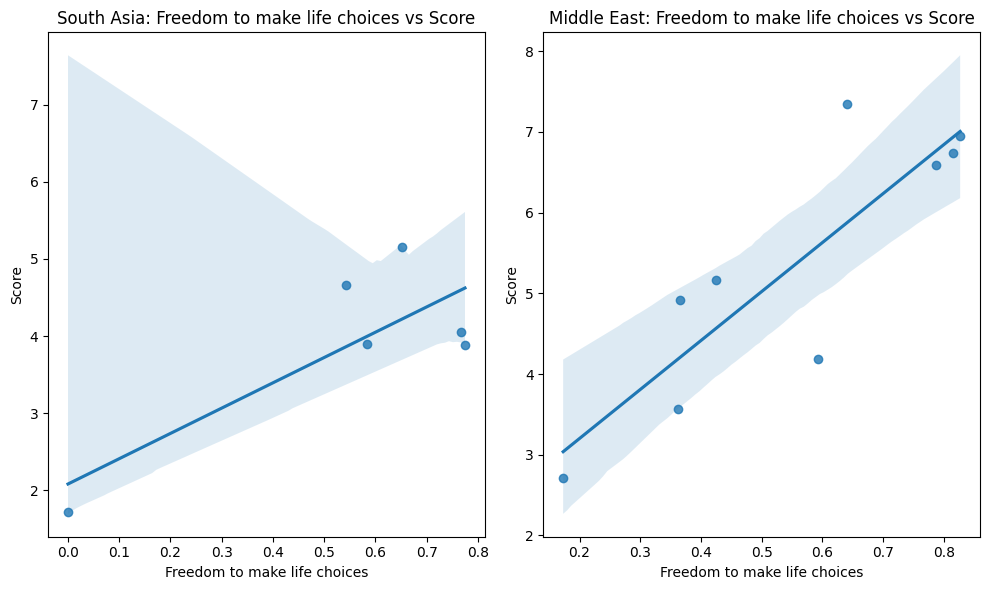

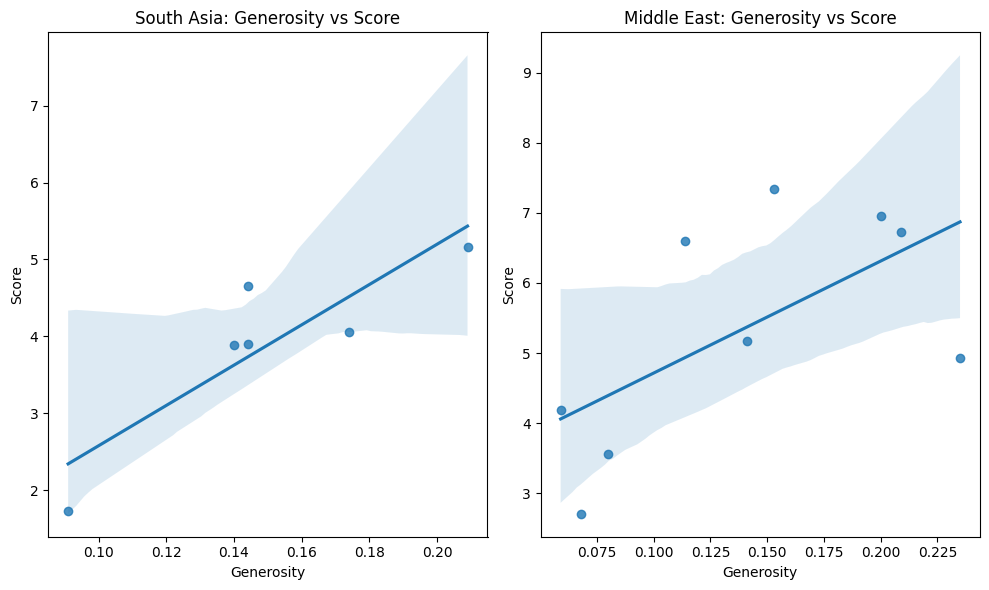

In [37]:
# 5. Correlation Analysis
# Correlation of Score with selected metrics
metrics_to_analyze = ['Freedom to make life choices', 'Generosity']
for metric in metrics_to_analyze:
    south_asia_corr = south_asia_data['score'].corr(south_asia_data[metric])
    middle_east_corr = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_asia_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_east_corr:.2f}")

# Scatter plots for correlations
for metric in metrics_to_analyze:
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'South Asia: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_data)
    plt.title(f'Middle East: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

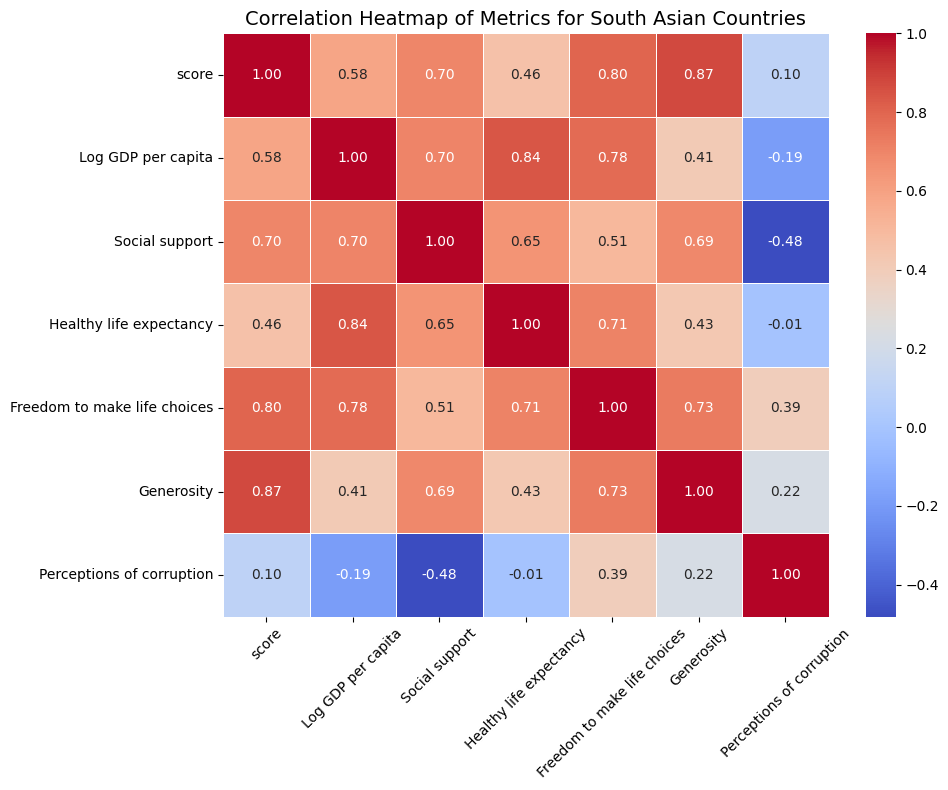

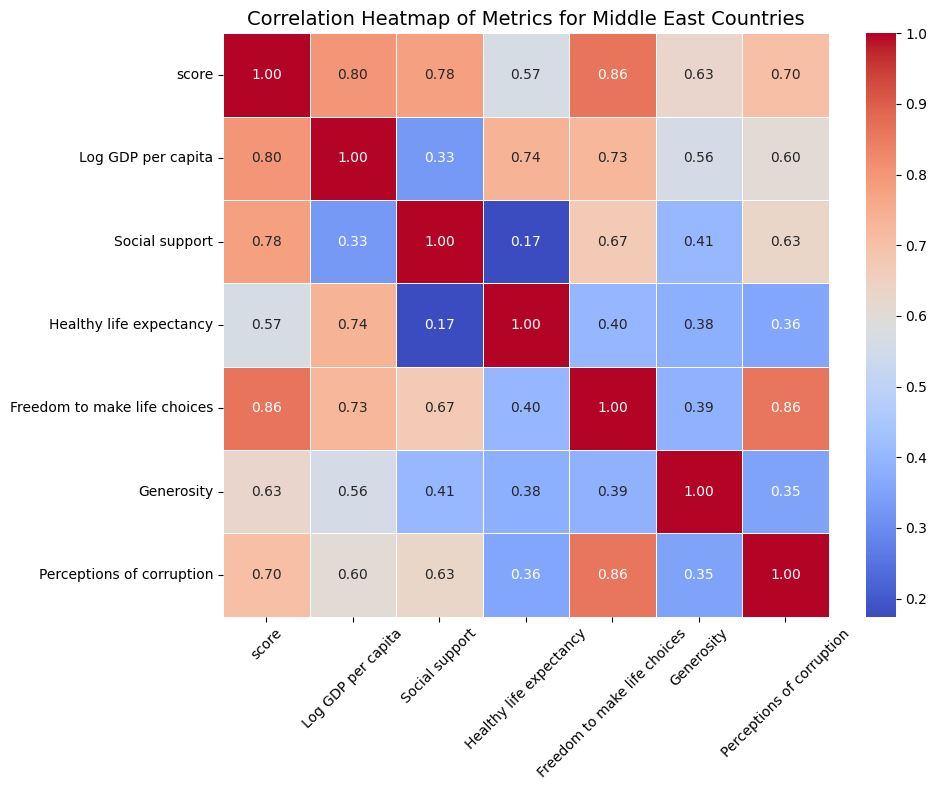

In [38]:
import numpy as np

# Select numerical columns for correlation analysis
numerical_columns = ['score', 'Log GDP per capita', 'Social support',
                     'Healthy life expectancy', 'Freedom to make life choices',
                     'Generosity', 'Perceptions of corruption']

# Calculate correlation matrix for South Asia
correlation_matrix_south_asia = south_asia_data[numerical_columns].corr()

# Calculate correlation matrix for Middle East
correlation_matrix_middle_east = middle_east_data[numerical_columns].corr()

# Create the heatmap for South Asia
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_south_asia, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Metrics for South Asian Countries', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Create the heatmap for Middle East
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_middle_east, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Metrics for Middle East Countries', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



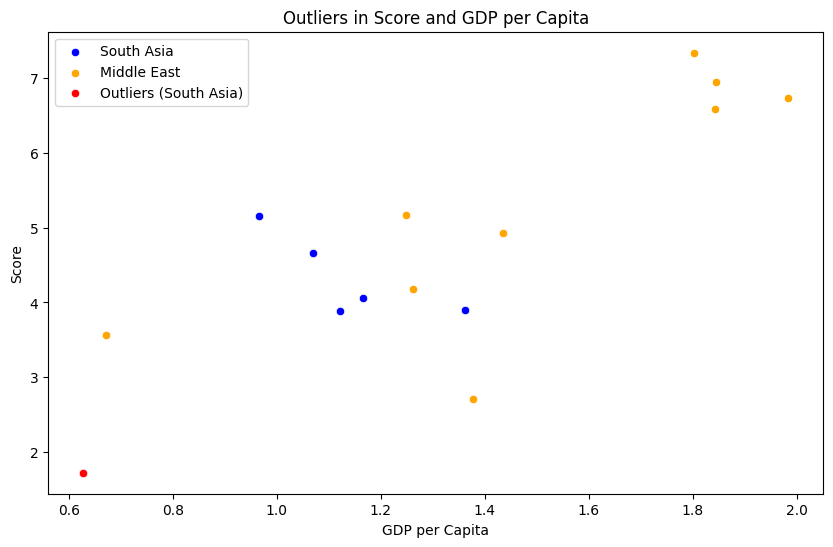

In [39]:
# 6. Outlier Detection
# Detect outliers in both regions
def detect_outliers(column, region_data):
    Q1 = region_data[column].quantile(0.25)
    Q3 = region_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return region_data[(region_data[column] < lower_bound) | (region_data[column] > upper_bound)]

south_asia_outliers = detect_outliers('score', south_asia_data)
middle_east_outliers = detect_outliers('score', middle_east_data)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='blue', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, color='orange', label='Middle East')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='red', label='Outliers (South Asia)')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='green', label='Outliers (Middle East)')
plt.title('Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

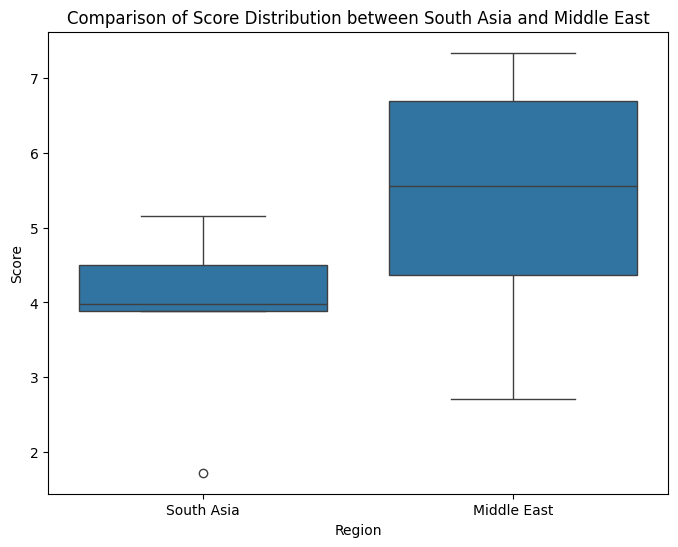

In [40]:
# 7. Visualization: Boxplot Comparison
# Boxplot for Score distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_data.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
]))
plt.title('Comparison of Score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()